# Topic 5, Example 3: Convolution of two continuous functions

In [1]:
import numpy as np
from numpy import logspace, linspace

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
%matplotlib inline

# plotting time period
NN = 1000

from sympy import lambdify, oo, Symbol, integrate, Heaviside, exp, plot, Piecewise, simplify
ts = Symbol('t')

def nicegrid():
    plt.grid(True, which='major', color='#666666', linestyle='-')
    plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.minorticks_on()

## Define two functions to convolve

In [2]:
def convolve(f, g, t, lower_limit=-oo, upper_limit=oo):
    tau = Symbol('__pick_a_name__', real=True)
    return integrate(f.subs(t, tau) * g.subs(t, t - tau), (tau, lower_limit, upper_limit))

Impulse response $\Large g(t) = \alpha e^{-\alpha t}$ - use $\large \alpha = 2$

Input $\Large w(t) = u(t) - 2u(t-\tau)$ -use $\large \tau=5$

In [5]:
tt = np.linspace(-1,10, NN)
tau = 5
alpha = 2

w = Heaviside(ts) - 2 * Heaviside(ts - tau)
g = alpha*exp(-alpha*ts)*Heaviside(ts)
f3 = convolve(w, g, ts, 0 ,ts)

#modules = [{'Heaviside': lambda x: np.heaviside(x, 1)}, 'numpy']
modules = ['numpy']

lam_w = lambdify(ts, w, modules=modules)
lam_g = lambdify(ts, g, modules=modules)
lam_f3 = lambdify(ts, simplify(f3), modules=modules)

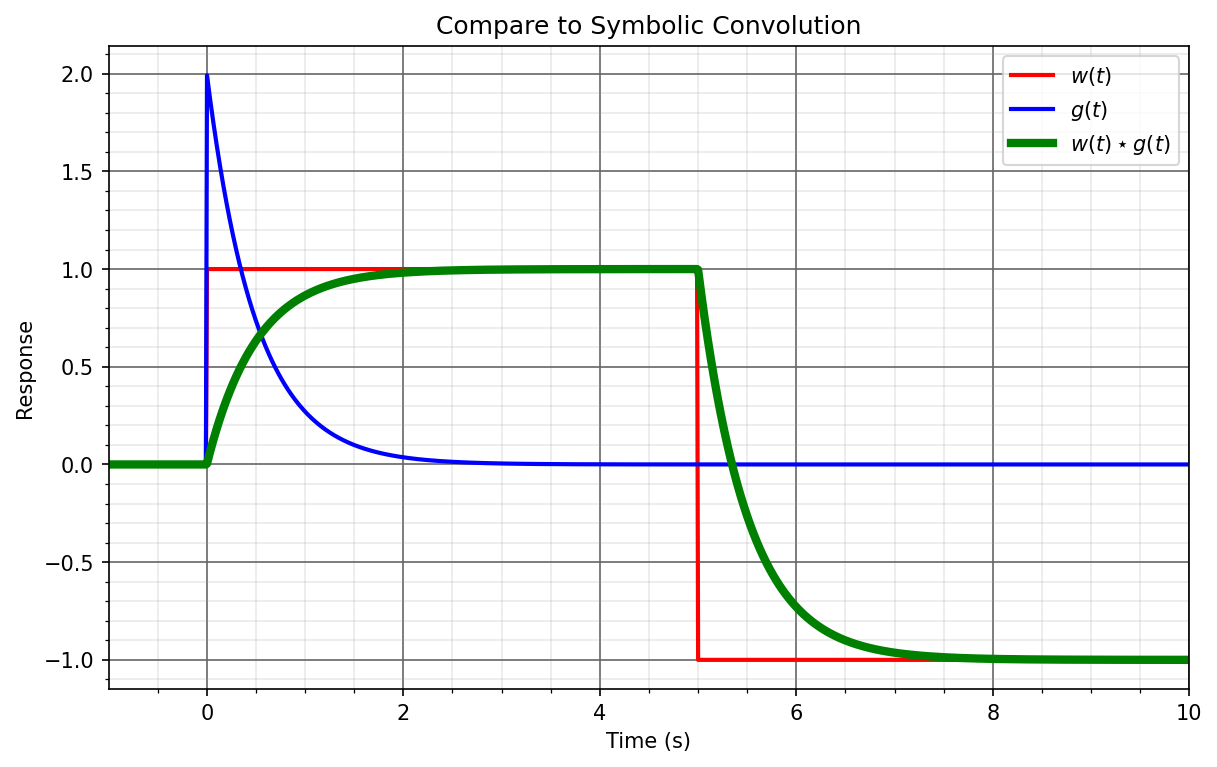

In [6]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_w(tt),'r-',linewidth=2,label='$w(t)$')
plt.plot(tt, lam_g(tt),'b-',linewidth=2,label='$g(t)$')
plt.plot(tt, lam_f3(tt),'g',linewidth=4,label='$w(t)\star g(t)$')

nicegrid()
plt.legend()
plt.xlim(min(tt),max(tt))
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Compare to Symbolic Convolution')
plt.show()
